In [1]:
#### PHASE ONE: CHECK EVERYTHING ####
# STEP ONE
# load everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# load dataframe
expression_df = pd.read_csv("/content/sample_data/THESIS/GSE108497_raw.tsv", sep="\t", index_col=0)

# Νέα ενότητα

In [2]:
# STEP 2
# check dataframe
# see first few rows of dataset
expression_df.head(5)

,GSM2901826,GSM2901827,GSM2901828,GSM2901829,GSM2901830,GSM2901831,GSM2901832,GSM2901833,GSM2901834,GSM2901835,...,GSM2902328,GSM2902329,GSM2902330,GSM2902331,GSM2902332,GSM2902333,GSM2902334,GSM2902335,GSM2902336,GSM2902337
gene,,,,,,,,,,,,,,,,,,,,,
EEF1A1,13.875300,13.909054,14.025441,13.683216,13.923740,13.727085,14.010168,14.117798,13.861524,13.555348,...,14.050222,13.385198,13.914049,13.941927,13.620335,12.976212,13.735491,13.825749,14.090491,14.060387
GAPDH,11.343188,11.241522,11.031051,11.259911,11.392425,11.562010,11.335288,10.953754,11.176741,11.164819,...,11.216188,11.402937,11.772067,11.263936,11.208338,11.141570,10.995710,11.425990,11.471332,11.573480
SLC35E2A,4.611838,4.448464,5.051040,5.018538,5.049110,4.644817,5.143432,4.865061,4.584262,4.752215,...,4.696324,4.803816,4.930717,4.778425,4.883161,4.550983,4.754289,4.867337,5.150634,4.776116
RPS28,12.569245,11.610888,11.926383,12.693447,11.831658,11.580271,12.573093,12.028145,11.559711,12.314642,...,11.980780,12.227999,11.353636,11.105736,10.786696,11.913131,11.878504,12.017417,12.448172,12.697129
IPO13,6.549957,6.524421,6.115866,6.919106,6.748423,6.859619,6.505282,6.224477,6.047737,6.654075,...,6.132318,7.075979,6.851842,6.664372,5.932977,6.708681,6.932569,6.665331,6.325681,6.827345


In [3]:
# see last few rows of dataset
expression_df.tail(5)

,GSM2901826,GSM2901827,GSM2901828,GSM2901829,GSM2901830,GSM2901831,GSM2901832,GSM2901833,GSM2901834,GSM2901835,...,GSM2902328,GSM2902329,GSM2902330,GSM2902331,GSM2902332,GSM2902333,GSM2902334,GSM2902335,GSM2902336,GSM2902337
gene,,,,,,,,,,,,,,,,,,,,,
HOTAIRM1,4.728393,4.676160,5.754131,4.720788,5.160461,5.821707,4.822670,5.018538,5.053371,4.917033,...,5.226867,5.296541,5.026248,5.700711,5.689785,5.962062,6.213491,5.282929,5.515688,5.357144
HIST1H3I,4.798975,4.750577,6.090864,4.676229,4.670962,4.514632,4.638068,4.531413,4.911594,5.066854,...,4.619252,4.783672,4.465761,5.059526,4.474753,4.509968,4.511995,5.377988,4.643657,4.435377
MBNL1-AS1,4.689223,4.583934,4.414629,4.624216,4.471361,4.895281,4.559784,4.504394,4.783672,4.394460,...,4.584262,4.571203,4.566074,4.470406,4.439753,4.566664,4.361996,4.983296,4.593118,5.112653
LOC102725126,6.496294,6.191149,6.766918,6.768596,6.753981,5.714771,6.162201,6.804885,6.149686,6.653756,...,5.542749,5.765213,6.404377,6.347840,6.521631,6.223908,5.889207,6.618402,6.135664,6.435965
FRG1HP,6.496294,6.191149,6.766918,6.768596,6.753981,5.714771,6.162201,6.804885,6.149686,6.653756,...,5.542749,5.765213,6.404377,6.347840,6.521631,6.223908,5.889207,6.618402,6.135664,6.435965


In [4]:
# ADD HERE, HOW MANY GENES AND SAMPLES WE HAVE, AND EVERYTHING ELSE WE MIGHT WANT TO KNOW FROM THIS DATAFRAME
# CHECK OLD CODE/ GITHUB
expression_df.shape

(13416, 512)

In [5]:
# Count how many genes
num_genes = expression_df.shape[0]
print("Number of genes:", num_genes)

Number of genes: 13416


In [6]:
# Count how many samples
# expression_df.shape returns a tuple: (number_of_genes, number_of_samples)
# So shape[1] gives you the number of columns, i.e., samples
num_samples = expression_df.shape[1]
print("Number of samples:", num_samples)

Number of samples: 512


In [10]:
# STEP 3
# check for existing NAs in every cell (a bit confusing so we need the total one)
# expression_df.isna()
# to check total NAs in each row
# print(f"\nTotal NAs in dataset: {expression_df.isna().sum()}")
# to check total NAs
print(f"\nTotal NAs in dataset: {expression_df.isna().sum().sum()}")


Total NAs in dataset: 0


In [12]:
# STEP 4
# check for duplicate genes
expression_df.index.duplicated()
print(f"Any duplicated genes: {expression_df.index.duplicated().any()}")

Any duplicated genes: False


In [15]:
# BEFORE STEP 5, where we make the graphs to actively see our dataset,
# I want to check the type of variables in every dataset, to see if we actually get
# the proper ones for each graph
print(expression_df.dtypes)

GSM2901826    float64
GSM2901827    float64
GSM2901828    float64
GSM2901829    float64
GSM2901830    float64
               ...   
GSM2902333    float64
GSM2902334    float64
GSM2902335    float64
GSM2902336    float64
GSM2902337    float64
Length: 512, dtype: object


In [ ]:
# which proves all are floats, so we can move on

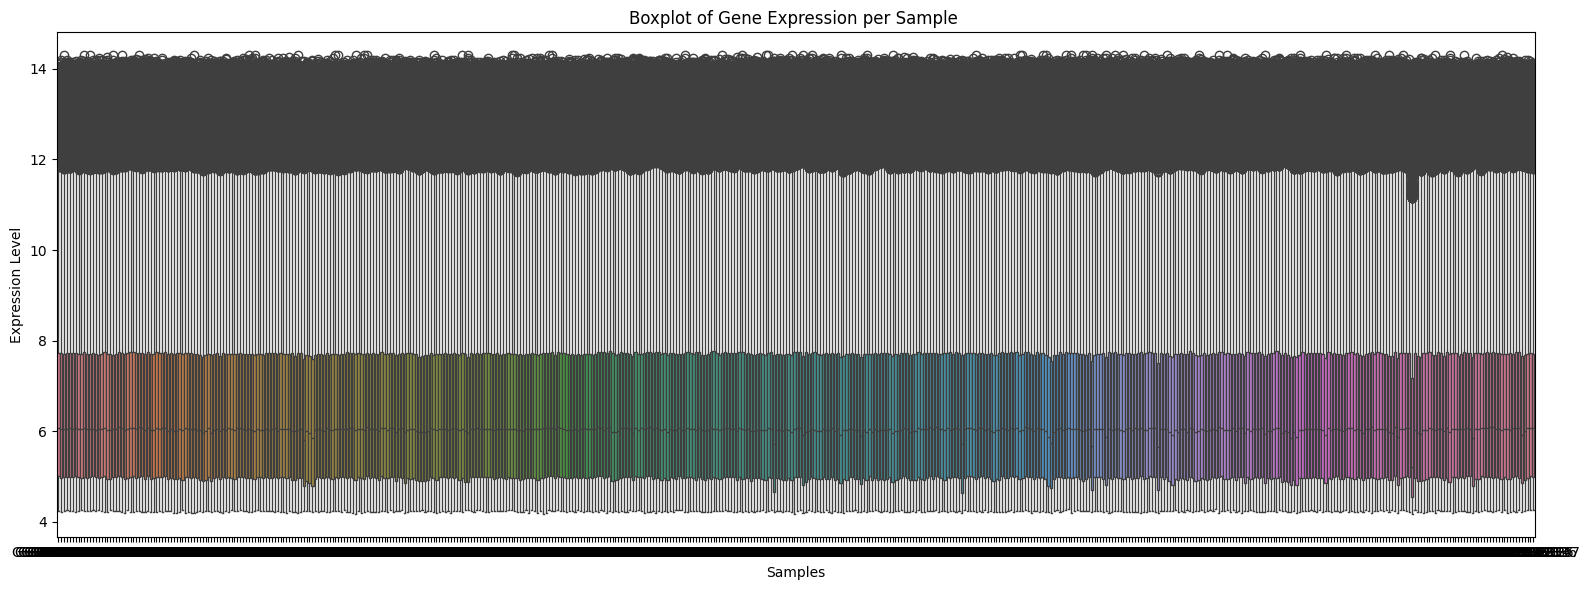

In [18]:
# STEP 5
# make distribution plots before Gene filtering

# BOXPLOT
plt.figure(figsize=(16, 6))
sns.boxplot(data=expression_df)
plt.title("Boxplot of Gene Expression per Sample ")
plt.xlabel("Samples")
plt.ylabel("Expression Level")
plt.tight_layout()
plt.show()

In [ ]:
# you can clearly see that we have 512 samples, so it is not possible to get a clear picture
# BUT we can make out the fact that visually some boxes are of different interquantile range
# therefore they have dissimilar spread and could mean they are outliers

In [20]:
# how to remove them:

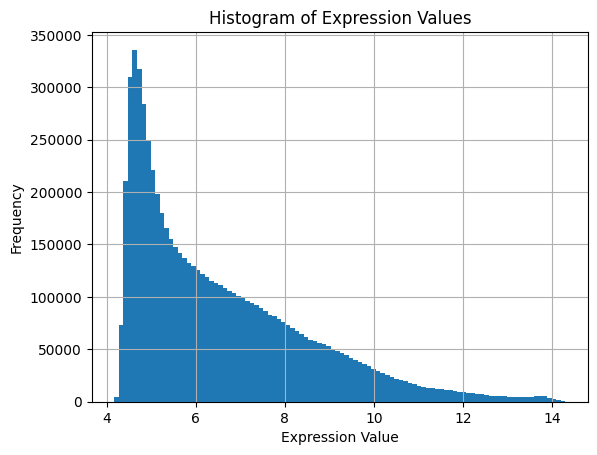

In [ ]:
# HISTOGRAM
expression_df.stack().hist(bins=100)
plt.title("Histogram of Expression Values")
plt.xlabel("Expression Value")
plt.ylabel("Frequency")
plt.show()

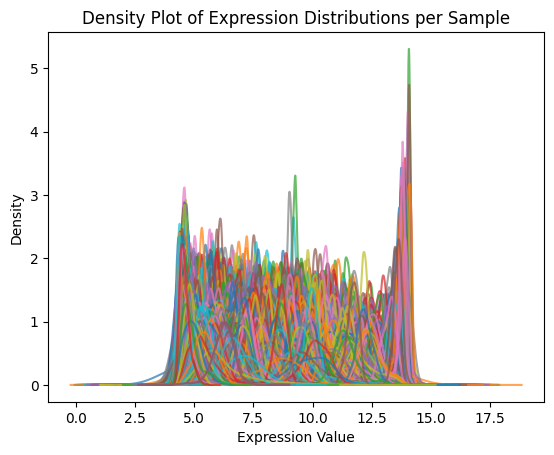

In [ ]:
# DENSITY PLOT
expression_df.T.plot(kind='density', legend=False, alpha=0.7)
plt.title("Density Plot of Expression Distributions per Sample")
plt.xlabel("Expression Value")
plt.show()

In [ ]:
# MA PLOT

In [ ]:
#### PHASE 2 ####
# STEP 1
# drop NAs and duplicates
expression_df = expression_df.dropna()
expression_df = expression_df[~expression_df.index.duplicated(keep='first')]

In [ ]:
# STEP 2
# remove outliers
# expression_df = expression_df[(np.abs(z_scores) < 3).all(axis=1)]

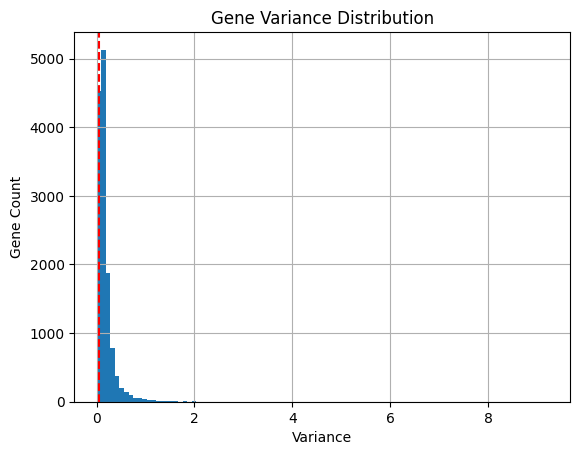

In [ ]:
# STEP 3
# filter out low variance genes
variances = expression_df.var(axis=1)
variances.hist(bins=100)
plt.axvline(x=variances.quantile(0.10), color='red', linestyle='--')
plt.title("Gene Variance Distribution")
plt.xlabel("Variance")
plt.ylabel("Gene Count")
plt.show()
threshold = variances.quantile(0.10)
expression_df = expression_df[variances > threshold]

In [ ]:
# STEP 4
# filter out low expression genes
mean_expression = expression_df.mean(axis=1)
low_expr_thresh = mean_expression.quantile(0.10)
expression_df = expression_df[mean_expression > low_expr_thresh]

In [ ]:
# DO NOT DO, DOES NOT REDUCE DIMENTIONALITY LIKE WE WANT

# STEP 5: OPTIONAL
# filter out low quality samples
sample_sums = expression_df.sum(axis=0)
low_sample_thresh = sample_sums.quantile(0.10)
expression_df = expression_df.loc[:, sample_sums > low_sample_thresh]

In [ ]:
# CHECK OLD PPT PRESENTATIONS, I HAD MADE IN SEPTEMBER, TO COMPARE AND SEE WHAT TO ADD AND WHAT DO THINK OF THE RESULTS